# task 7

Request :
In the past, the company had a policy that assigned a level of importance to orders and acted differently in some issues (such as how to send, etc.) To check whether this policy is worth the company's hardships or not?
Solution :
To check if the policy is worth the company's hardships, you can perform hypothesis testing. You may use a t-test or ANOVA to compare the importance of orders with and without the policy."


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import statsmodels.api as sm


In [37]:
# connect to data base 
from sqlalchemy import create_engine, Column, Integer, String, MetaData, Table

# Initialize SQLAlchemy Metadata object
meta = MetaData()
# Define database connection details
USERNAME = 'root'
PASSWORD = '1393ram1393#$'
SERVER = 'localhost'
# Create a SQLAlchemy engine for connecting to the MySQL database
engine = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{SERVER}:3306/Laptop_analysis_and_Warehousing_g3', echo=True)
conn = engine.connect()

2023-10-29 14:10:26,287 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-10-29 14:10:26,287 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-29 14:10:26,290 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-10-29 14:10:26,290 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-29 14:10:26,291 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-10-29 14:10:26,292 INFO sqlalchemy.engine.Engine [raw sql] {}


In [38]:
metadata = MetaData()

# Replace "your_table_name" with the name of your table
table_name = "order"

your_table = Table(table_name, metadata, autoload=True, autoload_with=engine)


2023-10-29 14:10:26,304 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `order`
2023-10-29 14:10:26,305 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-10-29 14:10:26,311 INFO sqlalchemy.engine.Engine 
                    select table_schema, table_name, column_name
                    from information_schema.columns
                    where (table_schema, table_name, lower(column_name)) in
                    ((%(table_data_1_1)s, %(table_data_1_2)s, %(table_data_1_3)s));
                
2023-10-29 14:10:26,311 INFO sqlalchemy.engine.Engine [generated in 0.00135s] {'table_data_1_1': 'laptop_analysis_and_warehousing_g3', 'table_data_1_2': 'laptop', 'table_data_1_3': 'laptop_id'}
2023-10-29 14:10:26,316 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `laptop`
2023-10-29 14:10:26,317 INFO sqlalchemy.engine.Engine [raw sql] {}


In [39]:
# Define the columns you want to read
from sqlalchemy.orm import sessionmaker

# Initialize SQLAlchemy session
Session = sessionmaker(bind=engine)

# Assuming you have a session and SQLAlchemy model defined as mentioned before
session = Session()

# Define the columns you want to read
Price = your_table.c.Total_Price
Profit = your_table.c.Profit
Priority = your_table.c.Order_Priority
ship_date = your_table.c.Ship_Duration

# Query the database to fetch the data for the specified columns
results = session.query(Price,  Profit, Priority, ship_date).all()

# Convert the results to a Pandas DataFrame
data = [(row[0], row[1], row[2], row[3]) for row in results]
df_order = pd.DataFrame(data, columns=["Price", "Profit", "Priority", "ship_date"])
df_order

2023-10-29 14:10:26,330 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-10-29 14:10:26,334 INFO sqlalchemy.engine.Engine SELECT `order`.`Total_Price` AS `order_Total_Price`, `order`.`Profit` AS `order_Profit`, `order`.`Order_Priority` AS `order_Order_Priority`, `order`.`Ship_Duration` AS `order_Ship_Duration` 
FROM `order`
2023-10-29 14:10:26,334 INFO sqlalchemy.engine.Engine [generated in 0.00064s] {}


,Price,Profit,Priority,ship_date
0,3450000.0,250000.0,H,3
1,1100000.0,100000.0,M,5
2,15580000.0,1920000.0,L,10
3,20150000.0,2170000.0,H,3
4,4250000.0,430000.0,M,6
...,...,...,...,...
1017076,1150000.0,80000.0,L,10
1017077,1350000.0,130000.0,L,8
1017078,15150000.0,1680000.0,L,8
1017079,8950000.0,1140000.0,M,6


In [40]:
# close the session of database 
session.close()

2023-10-29 14:11:35,379 INFO sqlalchemy.engine.Engine ROLLBACK


In [41]:
# close the connection of database 
conn.close()

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_order['Priority'] = label_encoder.fit_transform(df_order['Priority'])
df_order

,Price,Profit,Priority,ship_date
0,3450000.0,250000.0,1,3
1,1100000.0,100000.0,3,5
2,15580000.0,1920000.0,2,10
3,20150000.0,2170000.0,1,3
4,4250000.0,430000.0,3,6
...,...,...,...,...
1017076,1150000.0,80000.0,2,10
1017077,1350000.0,130000.0,2,8
1017078,15150000.0,1680000.0,2,8
1017079,8950000.0,1140000.0,3,6


In [43]:
# Split the DataFrame based on 'column_name'
value_to_split_on = 1  # Change this to the desired value
High_priority = df_order[df_order['Priority'] <= value_to_split_on]
Low_priority = df_order[df_order['Priority'] > value_to_split_on]

In [44]:
High_priority

,Price,Profit,Priority,ship_date
0,3450000.0,250000.0,1,3
3,20150000.0,2170000.0,1,3
6,17700000.0,1740000.0,1,3
8,16200000.0,1110000.0,1,3
13,8550000.0,720000.0,1,2
...,...,...,...,...
1017057,1100000.0,90000.0,1,3
1017061,700000.0,60000.0,0,1
1017063,1200000.0,110000.0,0,1
1017069,4450000.0,550000.0,1,2


In [45]:
Low_priority

,Price,Profit,Priority,ship_date
1,1100000.0,100000.0,3,5
2,15580000.0,1920000.0,2,10
4,4250000.0,430000.0,3,6
5,2400000.0,260000.0,2,7
7,5300000.0,450000.0,3,5
...,...,...,...,...
1017076,1150000.0,80000.0,2,10
1017077,1350000.0,130000.0,2,8
1017078,15150000.0,1680000.0,2,8
1017079,8950000.0,1140000.0,3,6


In [46]:
# Perform the t-test for the two groups of high and low priority orders based on ship_duration
t_stat, p_value = stats.ttest_ind(High_priority['ship_date'], Low_priority['ship_date'])
# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: -1023.0549652832891
P-Value: 0.0


In [47]:

# Interpret the results
if p_value < 0.05:
    print('The means are significantly different.')
else:
    print('No significant difference found.')

The means are significantly different.


describe the t-test for the two groups of high and low priority orders based on ship_date
In practical terms, the results of this t-test suggest that there is a substantial and statistically significant difference in the time it takes to ship high priority orders compared to low priority orders. High priority orders appear to have a significantly shorter "ship_duration" on average, which may have implications for order processing and delivery efficiency.



 assumption of T-test for the two groups of high and low priority orders based on profit
 

In [49]:
# Calculate the average profit for each group
High_priority_avg = High_priority['ship_date'].mean()
Low_priority_avg = Low_priority['ship_date'].mean()
print(f'high_priority_avg :{High_priority_avg}')
print(f'low_priority_avg :{Low_priority_avg}')

high_priority_avg :2.1234742129119195
low_priority_avg :6.748336420641422


In [22]:
# Check the assumptions
# Assumption 1: Independence of Observations
# Nothing to code here; it's assumed based on the data structure.
'''Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.
'''

'Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.\n'

C:\Users\parham\.conda\envs\quera_bootcamp\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


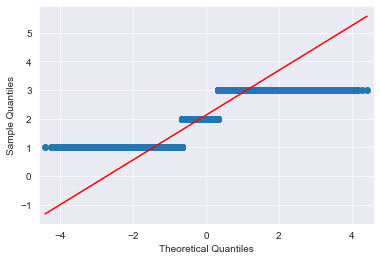

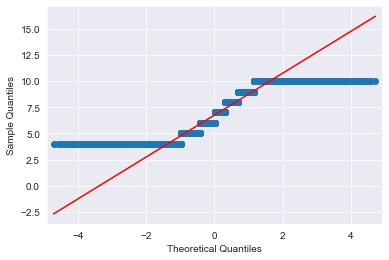

In [25]:
# Assumption 2: Normality
# Check normality using Q-Q plots and Shapiro-Wilk test
'''Normality: The data in each group should follow a roughly normal distribution. Normality is important because the t-test assumes that the sampling distribution of the means is normally distributed. You can check for normality using methods like histograms, Q-Q plots, or formal statistical tests (e.g., Shapiro-Wilk test).
'''
qqplot_column1 = sm.qqplot(High_priority['ship_date'], line='s')
qqplot_column2 = sm.qqplot(Low_priority['ship_date'], line='s')
shapiro_column1 = stats.shapiro(High_priority['ship_date'])
shapiro_column2 = stats.shapiro(Low_priority['ship_date'])

In [32]:
# Assumption 3: Homogeneity of Variance
# Check homoscedasticity using Levene's test
'''Homogeneity of Variance: The variances in the different groups being compared should be approximately equal (homoscedasticity). This assumption is important because the t-test assumes that the standard deviations of the two groups are equal. You can check for homogeneity of variance using statistical tests like Levene's test or by examining the spread of data within groups.
'''
levene_test = stats.levene(High_priority['ship_date'], Low_priority['ship_date'])
levene_test

LeveneResult(statistic=163072.52937919047, pvalue=0.0)

In [ ]:
# Check and print the results of the assumptions
print(f'Shapiro-Wilk Test - Column 1: W={shapiro_column1[0]}, p={shapiro_column1[1]}')
print(f'Shapiro-Wilk Test - Column 2: W={shapiro_column2[0]}, p={shapiro_column2[1]}')
print(f'Levene Test: W={levene_test[0]}, p={levene_test[1]}')

# T_test for Profit

In [50]:
# Perform the t-test for the two groups of high and low priority orders based on profit
t_stat, p_value = stats.ttest_ind(High_priority['Profit'],  Low_priority['Profit'])
# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: -1.0977135378069638
P-Value: 0.2723298562824459


In [51]:
# Interpret the results
if p_value < 0.05:
    print('The means are significantly different.')
else:
    print('No significant difference found.')

No significant difference found.


describe high priority orders and low priority orders based on profit
With a t-statistic of approximately -1.0977 and a p-value of 0.2723, the results suggest that you do not have strong statistical evidence to conclude that there is a significant difference in profit between high priority and low priority orders. In other words, you cannot confidently say that the profit levels of these two groups are different based on this t-test. The observed difference in profit could likely be due to random variation.

In [27]:
# Check the assumptions
# Assumption 1: Independence of Observations
# Nothing to code here; it's assumed based on the data structure.
'''Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.
'''

'Independence of Observations: The observations in each group must be independent of each other. This means that the value of one observation should not be influenced by or related to the values of other observations. If you have paired data, such as before-and-after measurements, you should use a paired samples t-test.\n'

C:\Users\parham\.conda\envs\quera_bootcamp\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


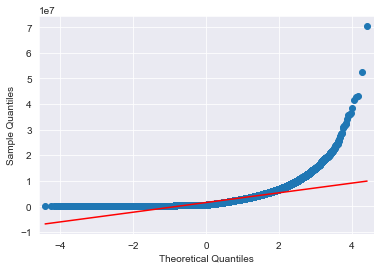

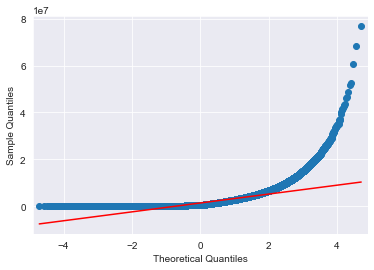

In [26]:
# Assumption 2: Normality
# Check normality using Q-Q plots and Shapiro-Wilk test
'''Normality: The data in each group should follow a roughly normal distribution. Normality is important because the t-test assumes that the sampling distribution of the means is normally distributed. You can check for normality using methods like histograms, Q-Q plots, or formal statistical tests (e.g., Shapiro-Wilk test).
'''
qqplot_column1 = sm.qqplot(High_priority['Profit'], line='s')
qqplot_column2 = sm.qqplot(Low_priority['Profit'], line='s')
shapiro_column1 = stats.shapiro(High_priority['Profit'])
shapiro_column2 = stats.shapiro(Low_priority['Profit'])

In [33]:
# Assumption 3: Homogeneity of Variance
# Check homoscedasticity using Levene's test
'''Homogeneity of Variance: The variances in the different groups being compared should be approximately equal (homoscedasticity). This assumption is important because the t-test assumes that the standard deviations of the two groups are equal. You can check for homogeneity of variance using statistical tests like Levene's test or by examining the spread of data within groups.
'''
levene_test_profit = stats.levene(High_priority['Profit'], Low_priority['Profit'])
levene_test_profit

LeveneResult(statistic=1.236936164763764, pvalue=0.2660626104357702)

In [35]:
# Check and print the results of the assumptions
print(f'Shapiro-Wilk Test - Column 1: W={shapiro_column1[0]}, p={shapiro_column1[1]}')
print(f'Shapiro-Wilk Test - Column 2: W={shapiro_column2[0]}, p={shapiro_column2[1]}')
print(f'Levene Test: W={levene_test_profit[0]}, p={levene_test_profit[1]}')


Shapiro-Wilk Test - Column 1: W=0.664831280708313, p=0.0
Shapiro-Wilk Test - Column 2: W=0.6701486706733704, p=0.0
Levene Test: W=1.236936164763764, p=0.2660626104357702
